In [9]:
import torch
from torch import nn
import os

import sys

sys.path.append("../")
sys.path.append("../../")

from pathlib import Path
import torchvision
import torchvision.transforms as T
from typing import Sequence
from torchvision.transforms import functional as F
import numbers
import random
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import torchmetrics as TM

from typing import Optional

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Convert a pytorch tensor into a PIL image
t2img = T.ToPILImage()
# Convert a PIL image into a pytorch tensor
img2t = T.ToTensor()

# Set the working (writable) directory.
working_dir = Path("/Users/fvelikon/projects/mri_cv/data/processed_data_split")

print(torch.backends.mps.is_available()) #the MacOS is higher than 12.3+
print(torch.backends.mps.is_built()) #MPS is activated
torch.cuda.is_available()

USE_MPS = True


True
True


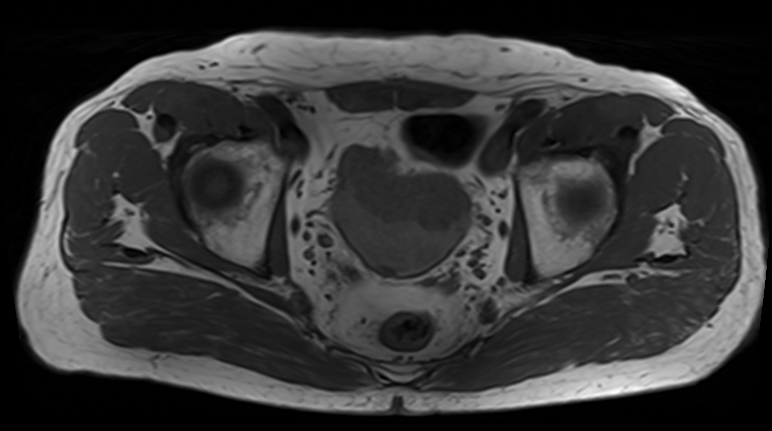

In [10]:
data = torch.load(working_dir / "train" / "20.pt")[0][None, ...]
t2img(data)

In [13]:
from models import Unet

state_dict = torch.load("../../runs/unet_weight_decay_lr001/last.pth", map_location="cpu")

unet = Unet(1, 2).load_state_dict(state_dict)

In [15]:
import cv2
import glob
from IPython.display import Image

In [23]:
from PIL import Image

In [55]:
images_dir = Path("/Users/fvelikon/projects/mri_cv/runs/unet_weight_decay_warmup_100_epochs_augs/VAL").glob("epoch_*.png")


filenames = sorted(images_dir, key=lambda name: int(name.stem.split("_")[-1]))
images = [Image.open(image) for image in filenames]
images += [images[-1]] * 100

vid_name = Path("../segmentation.gif")

frame_one = images[0]
frame_one.save(vid_name, format="GIF", append_images=images,
            save_all=True, duration=100, loop=0)